In [2]:
## import json
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
import ast
import re
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import sklearn.manifold
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import os
import json
%matplotlib inline

tweet_data = []
counter = 0

# path = 'data_reservoir_sample/'
# jsons = [jsonfile for jsonfile in os.listdir(path) if jsonfile.endswith('.json')]

# load in all json data files
# for index, js in enumerate(jsons):
#     with open(os.path.join(path, js)) as json_file:
#         for line in json_file:
#             tweet_data.append(json.loads(line))
#             counter += 1
                  
with open('data_reservoir_sample/tweet_sample.json') as f:
    for line in f:
        tweet_data.append(json.loads(line))
        counter += 1

tweet_df = pd.DataFrame(tweet_data[0])

In [3]:
# Sample from 300k -> 150k
# tweet_df = tweet_df.sample(frac=1)

In [4]:
tweet_text_df = pd.DataFrame()
tweet_text_df['text'] = [s.split() for s in tweet_df['text'] if isinstance(s, str)]

In [5]:
tweet_text_df

,text
0,"[Wtf?, Is, there, something, funny, (not, in, ..."
1,"[RT, @NathanZed:, IF, YALL, DONT, STOP, ACTING..."
2,"[RT, @bendandSNAPPER:, Find, someone, who, loo..."
3,"[RT, @mmmifla:, yo, pensaba, que, los, candida..."
4,"[RT, @BrookeHyland1:, #IVoted]"
5,"[RT, @memeprovider:, We, don't, want, Trump,, ..."
6,"[If, trump, wins, the, only, nigga, that's, go..."
7,"[RT, @Reebecachaves:, La, gente, poc,, lgbt, y..."
8,"[RT, @luispazos1:, Lo, q, +, le, pegará, a, Mé..."
9,"[RT, @VaishnudebiD:, Let's, make, a, small, po..."


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=500, max_df=0.8)
topics = [' '.join(strings) for strings in tweet_text_df['text']]
dtm = vectorizer.fit_transform(topics) #.toarray()

import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
        for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in topics]

dtm = vectorizer.fit_transform(stemmed_data)
terms = vectorizer.get_feature_names()

In [36]:
### Save dtm for later (access with np.load(...))
# np.save('dtm.npy', dtm)

# dtm_loaded = np.load('dtm.npy')

### Saved terms to text file just in case
# with open("terms.txt", "w") as file:
#     for item in terms:
#         file.write("%s\n" % item)

In [ ]:
# terms_loaded = []
# with open('terms.txt', 'r') as file:
#     for line in file:
#         terms.append(line.replace('\n',''))
# terms_loaded

Created dense dtm matrix
Created centered dtm
Ran randomized_svd and assigned u, s, vt


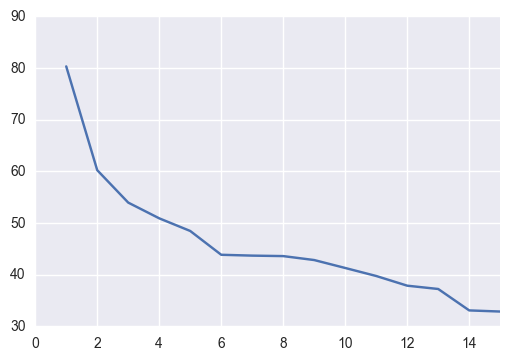

In [7]:
# PCA / Truncated SVD to deal with sparse data
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

dtm_dense = dtm.todense()
print('Created dense dtm matrix')

centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
print('Created centered dtm')

u, s, vt = randomized_svd(centered_dtm, n_components=15, n_iter=5, random_state=None)
print('Ran randomized_svd and assigned u, s, vt')

plt.xlim([0,15])
plt.plot(range(1,len(s)+1),s)

In [ ]:
# Silhouette Score
# ss = []
# maxlen = len(u)
# for k in range(1,20):
#     vectorsk = u[:,:k] @ np.diag(s[:k])
#     kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=10, random_state=0)
#     kmeans.fit_predict(vectorsk)
#     labelsk = kmeans.labels_
#     ss.append(metrics.silhouette_score(vectorsk,labelsk,metric='euclidean'))
    
# plt.plot(range(1,10),ss)
# plt.xlabel('No Principal Components',size=20)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# fit LSA with 7 principal components
from sklearn.preprocessing import Normalizer
lsa = TruncatedSVD(7, algorithm='randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
# dist_matrix = 1 - cosine_similarity(dtm_lsa)

pd.DataFrame(lsa.components_,index=['comp1','comp2','comp3','comp4','comp5', 'comp6', 'comp7'],columns=terms)

,000,10,100,11,2016,50,act,actual,ago,ahead,...,work,world,wrong,ya,yall,year,yes,yo,york,youtub
comp1,0.004813,0.003808,0.008847,0.005427,0.018515,0.003686,0.003020,0.006939,0.003427,0.003641,...,0.009672,0.010877,0.003858,0.008918,0.004478,0.015195,0.004478,0.003875,0.005205,0.005995
comp2,-0.005808,-0.005400,-0.009419,-0.006143,-0.005035,-0.005026,-0.004374,-0.009349,-0.003354,-0.003586,...,-0.011900,-0.012202,-0.004259,-0.007248,-0.009592,-0.020675,-0.002055,-0.005421,-0.003252,-0.000778
comp3,0.007035,0.003249,0.010097,0.001557,0.022027,0.004017,0.004020,0.005075,0.002735,0.003879,...,0.015013,0.006295,0.003508,-0.004806,0.018754,0.012016,0.004928,-0.002999,0.003971,0.002817
comp4,0.000429,0.001527,-0.007742,0.000857,0.048976,0.000109,0.005308,0.007420,0.004099,0.000239,...,0.002769,0.009534,0.006337,-0.001340,-0.001600,0.014207,-0.001197,-0.001669,-0.003313,-0.004287
comp5,0.001998,-0.002303,-0.012238,-0.003270,-0.044379,-0.002239,-0.003296,0.001784,-0.003235,-0.001237,...,-0.003563,-0.004935,-0.003675,-0.002278,0.012242,-0.016422,0.000911,-0.001525,-0.003202,-0.007610
comp6,-0.002472,0.001433,0.000149,0.003138,0.003305,0.000693,-0.000736,-0.003134,0.000152,-0.001190,...,-0.002396,0.003167,-0.000978,0.021909,-0.011389,0.003965,-0.002781,0.012026,-0.000765,-0.008957
comp7,0.003534,-0.000667,-0.049046,0.004840,0.022077,-0.007864,-0.002916,-0.007317,-0.002684,0.000645,...,-0.008536,-0.008747,-0.002269,0.014324,0.002110,-0.018416,-0.001043,0.008600,0.005113,0.007063


In [8]:
for i in range(7):
    top = np.argsort(vt[i])[::-1]
    topterms = [terms[top[f]] for f in range(20)]
    print(i,topterms)
    
# get better defined categories after loading higher volume of tweets
# current categories: {0 : pro_hillary, 1 : voting (?), 2 : misc (?), 3 : anti_hillary, 4 : pro_trump }

0 ['https', 'rt', 'electionday', 'election2016', 'imwithh', 'clinton', 'video', 'wikileak', 'donald', 'victori', 'youtub', 'read', 'ivot', 'project', '2016', 'tower', 'post', 'protest', 'sign', 'busi']
1 ['trump', 'donald', 'rt', 'presid', 'que', 'win', 'fuck', 'la', 'support', 'en', 'el', 'electionnight', 'se', 'kurteichenwald', 'president', 'won', 'si', 'victori', 'es', 'los']
2 ['hillari', 'clinton', 'vote', 'rt', 'support', 'hate', 'campaign', 'wikileak', 'email', 'lie', 'liar', 'lead', 'win', 'hillaryclinton', 'fbi', 'bitch', 'imvotingbecaus', 'elector', 'electionday', 'electionnight']
3 ['vote', 'electionday', 'trump', 'rt', 'today', 'election2016', 'peopl', 'imwithh', 'cast', 'did', 'pleas', 'https', 'poll', 'just', 'told', 'nbcwashington', 'nbc4dc', 'voter', 'popular', 'think']
4 ['elect', 'hillari', 'donald', 'rt', 'clinton', 'trump', 'day', 'vote', 'win', 'presid', '2016', 'result', 'like', 'presidenti', 'tomorrow', 'night', 'state', 'everyon', 'peopl', 'fuck']
5 ['rt', 'elec

In [ ]:
# Evaluating number of clusters for k-means

k = 10
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10,random_state=0)
kmeans.fit_predict(dtm_lsa)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

# Evaluate clusters for K-Means++ Clustering
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=100)
kmeans.fit_predict(dtm_lsa)
labels = kmeans.labels_

# Evaluate number of clusters with silhouette coefficient
scoeff = metrics.silhouette_score(dtm_lsa, labels, metric='euclidean')
print(scoeff)

def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
        kmeans.fit_predict(dtm_lsa)
        s[k] = metrics.silhouette_score(dtm_lsa,kmeans.labels_,metric='cosine')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
sc_evaluate_clusters(dtm_lsa,10)

In [ ]:
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

# Performing k-means++ with 5 clusters
nclusters = 5
kmeans = KMeans(n_clusters=nclusters)
kmeans.fit_predict(dtm_lsa)
clusters = kmeans.labels_.tolist()

# Multidimensional Scaling for 2-dimensional plotting 
# mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
# p = mds.fit_transform(dist_matrix)
# x_vals = p[:, 0]
# y_vals = p[:, 1]

# PCA for 2-d scaling
pca = PCA(n_components=7)
X = pca.fit_transform(dtm_lsa)
plt.scatter(X[:, 0], X[:, 1]) 

In [ ]:
colors = {0: 'b', 1: 'g', 2: 'r', 3: 'm', 4: 'c'}

cluster_names = {0: 'pro_hillary', 
                 1: 'voting (?)', 
                 2: 'misc (?)', 
                 3: 'anti_hillary (?)', 
                 4: 'pro_trump'}

df = pd.DataFrame(dict(x=x_vals, y=y_vals, label=clusters)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(20, 10)) 
ax.margins(0.05)

# plot groups 
for name, group in groups:
    # scatter_kws={"marker": "D", 'color':'#673AB7','alpha':.5,'s':100},
    ax.plot(group.x, group.y, marker='D', linestyle='', ms=12, label=cluster_names[name], color=colors[name], alpha=.5, mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')
    
ax.legend(numpoints=1,prop={'size':20})
    
plt.show()

### Second Half of Project

In [ ]:
# '''Algorithm R Implementation
# (*S has items to sample, R will contain the result*)

# ReservoirSample(S[1..n], R[1..k])
#   // fill the reservoir array
#   for i = 1 to k
#       R[i] := S[i]

#   // replace elements with gradually decreasing probability
#   for i = k+1 to n
#     j := random(1, i)   // important: inclusive range
#     if j <= k
#         R[j] := S[i]
# '''

# import subprocess
# import os
# import time
# import random 
# import json
# import csv

# path = 'data_cleaned/'
# jsons = [jsonfile for jsonfile in os.listdir(path) if jsonfile.endswith('.json')]

# count = 0
# reservoir = []
# times = {}

# def get_interval(datestring):
#     ddhhmm = datestring[8:19].replace(' ', '').replace(':', '')
#     if int(ddhhmm[-2:]) >= 30:
#         ddhhmm = ddhhmm[:-2] + '30'
#     else:
#         ddhhmm = ddhhmm[:-2] + '00'
#     return ddhhmm

# r_size = 300000 # sample size of 300k

# for jsonfile in jsons:
#   with open(path + jsonfile, encoding='utf-8') as f:
#     for item in f:
#         r = json.loads(item)
#         try:
#             # get frequency of tweets in 30 minute intervals
#             interval = get_interval(r["created_at"])
#             if interval not in times:
#                 times[interval] = 1
#             else:
#                 times[interval] += 1  

#             # Reservoir sampling
#             if count < r_size:
#                 reservoir.append(r)
#             else:
#                 j = random.randint(1, count)
#                 if j < r_size:
                    
#                     if count % 100000 == 0: # print progress 
#                         print('went through ' + str(count) + ' items')
#                         #print('replacing index ' + str(j) + ' with item')
                        
#                     reservoir[j] = r

#             count += 1  

#         except:
#             continue

# print('DONE. Went through ' + str(count) + ' items total.')

# # save reservoir to new json file 
# with open('tweet_sample.json', 'w') as f:
#     json.dump(reservoir, f)

# # save times to csv
# with open('times_data.csv', 'w') as f:  
#     w = csv.DictWriter(f, times.keys())
#     w.writeheader()
#     w.writerow(times)


### Trying things on all the data

KeyboardInterrupt: 

### Final Project and Poster Session Guidelines

The rubric for the final poster and report will be based on the following:

I. Datasets
* Demonstrate a good understanding of the dataset and its properties.
* Clearly identify how the datasets was collected and cleaned.

II. Methods
* Describe the methods used clearly.
* Describe why these are the right methods to use for the questions investigated. 
* Demonstrate a good understanding of the methods used, including strengths and weaknesses.
* Demonstrate a good understanding of the output of the methods.

III. Analysis and Results
* Perform analysis correctly and appropriately.
* Demonstrate understanding of the results of the analysis, as they relate to the goals.
* Use appropriate visualization to present results (charts, graphs, maps, etc).

IV. Presentation
* Clearly state the goals of the project at the start.
* Present the overall project clearly, with appropriate graphics, and emphasizing key points.
* Underscore the key aspects and conclusions of the project.
* Present project clearly in oral and poster form.